In [1]:
import pickle
from os.path import join
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fibanocci

In [2]:
log_dir = '../slurms/logs'
fig_dir = '/home/zacharykeskinen/CS430-TeamE/PA2/figures'
fp = join(log_dir,'fib_openmp-407854.log')
with open(fp, 'r') as f:
    lns = f.readlines()

In [73]:
df = pd.DataFrame()
for i, l in enumerate(lns):
    if 'Running with' in l and i == 0:
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    if 'Running with' in l and i != 0:
        for k, v in block.items():
            df.loc[thread_c, f'{k}_max'] = np.max(v)
            df.loc[thread_c, f'{k}_min'] = np.min(v)
            df.loc[thread_c, f'{k}_mean'] = np.mean(v)
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    else:
        if '10th' in l:
            size = 'small'
        elif '30th' in l:
            size = 'med'
        elif '40th' in l:
            size = 'large'
        elif 'microseconds' in l:
            block[size].append(int(l.split(' ')[4]))
    

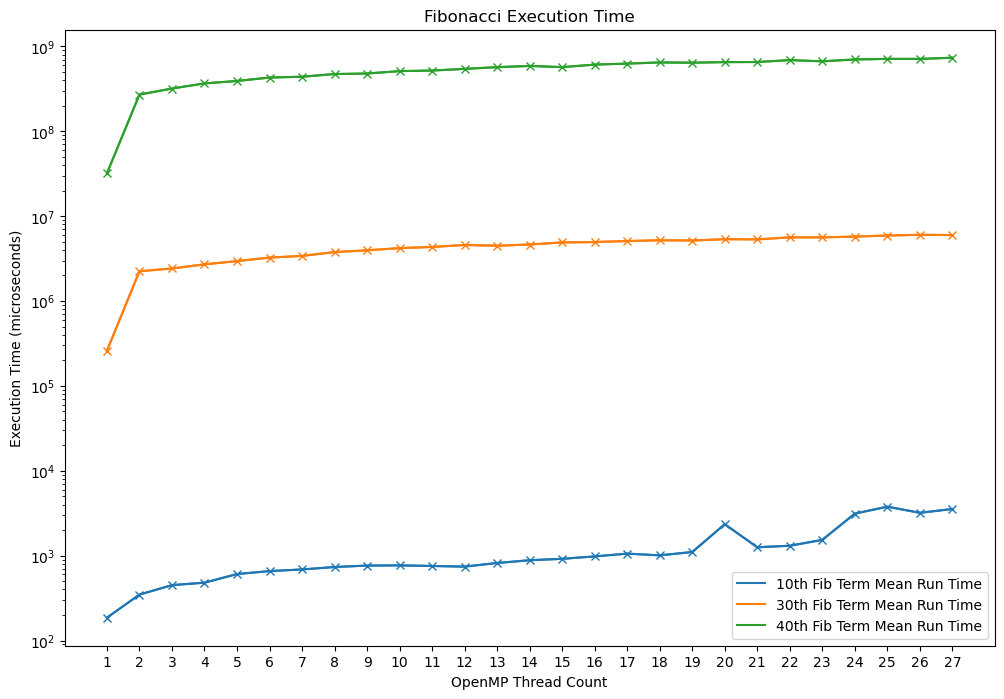

In [74]:
title = 'Fibonacci Execution Time'

f, ax= plt.subplots(figsize = (12,8))

# df[['small_mean','med_mean','large_mean']].plot(ax = ax, legend=True)

ax.legend(labels=['10th Term Execution Time Mean','30th Term Execution Time Mean','40th Term Execution Time Mean'])
col_name = {'small':'10th Fib Term', 'med':'30th Fib Term', 'large':'40th Fib Term'}
for i, col in enumerate(['small', 'med', 'large']):
    plt.plot(df.index, df[f'{col}_mean'], label = f'_{col_name[col]} Mean Run Time', marker = 'x')
    plt.plot(df.index, df[f'{col}_mean'], label = f'{col_name[col]} Mean Run Time', color = f'C{i}')
    # ax.fill_between(x = df.index, y1 = df[f'{col}_min'], y2 = df[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.yscale('log')
plt.ylabel('Execution Time (microseconds)')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'fib' + '_execution_timev2.png'))

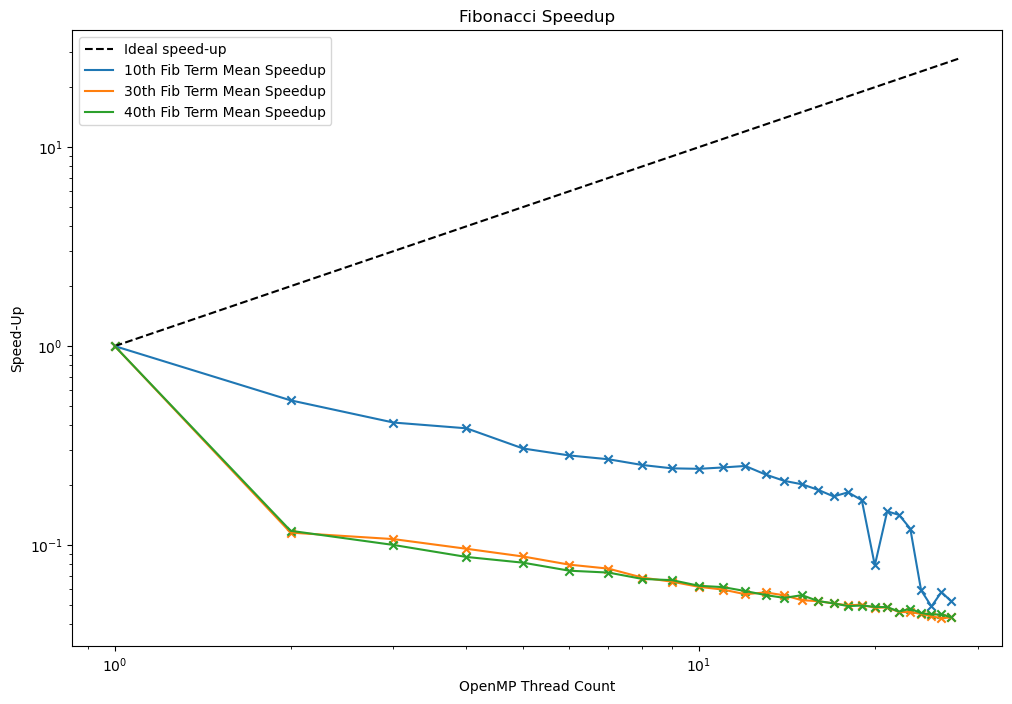

In [54]:
title = 'Fibonacci Speedup'

f, ax= plt.subplots(figsize = (12,8))

speed = df.iloc[0]/df
speed.index = range(1, 28)
ideal = range(1, 29)

ax.plot(ideal, ideal, label = 'Ideal speed-up', color = 'black', linestyle = 'dashed')

ax.legend(labels=['10th Term Execution Time Mean','30th Term Execution Time Mean','40th Term Execution Time Mean'])
col_name = {'small':'10th Fib Term', 'med':'30th Fib Term', 'large':'40th Fib Term'}
for col in ['small', 'med', 'large']:
    plt.scatter(speed.index, speed[f'{col}_mean'], label = f'_{col_name[col]} Mean Speedup', marker = 'x')
    plt.plot(speed.index, speed[f'{col}_mean'], label = f'{col_name[col]} Mean Speedup')
    # ax.fill_between(x = speed.index, y1 = speed[f'{col}_min'], y2 = speed[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Speed-Up')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'fib' + '_speedupv2.png'))

## Pi Leibniz

In [55]:
fp = join(log_dir,'pi_leibniz_openmp-407877.log')
with open(fp, 'r') as f:
    lns = f.readlines()
df = pd.DataFrame()
for i, l in enumerate(lns):
    if 'Running with' in l and i == 0:
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    if 'Running with' in l and i != 0:
        for k, v in block.items():
            df.loc[thread_c, f'{k}_max'] = np.max(v)
            df.loc[thread_c, f'{k}_min'] = np.min(v)
            df.loc[thread_c, f'{k}_mean'] = np.mean(v)
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    else:
        if '10000 values' in l:
            size = 'small'
        elif '1000000 values' in l:
            size = 'med'
        elif '20000000000 values' in l:
            size = 'large'
        elif 'microseconds' in l:
            block[size].append(int(l.split(' ')[2]))
    

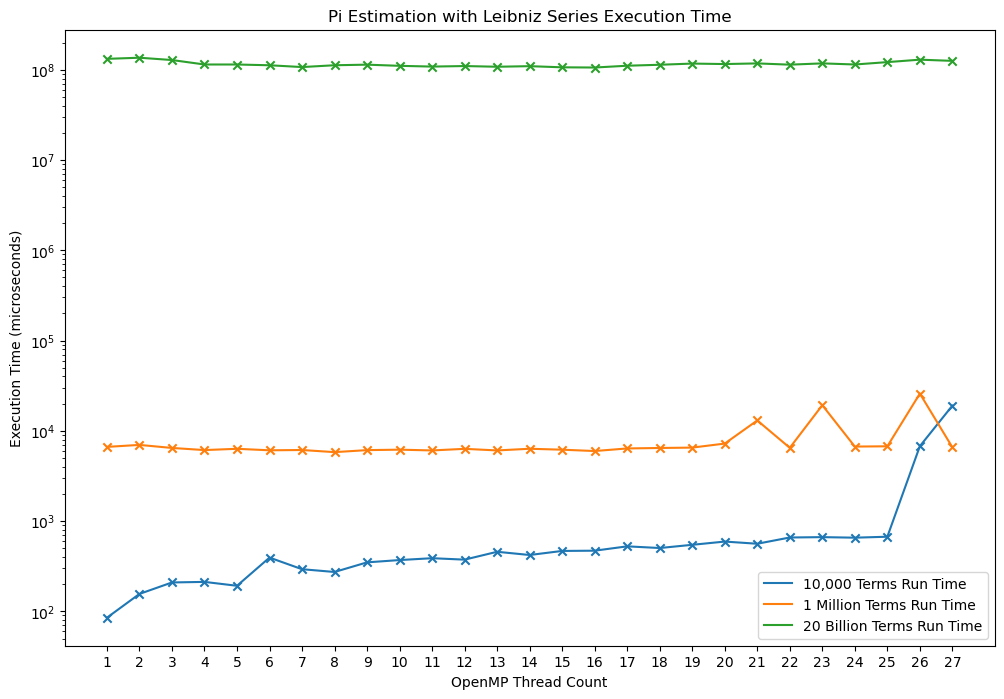

In [56]:
title = 'Pi Estimation with Leibniz Series Execution Time'

f, ax= plt.subplots(figsize = (12,8))

# df[['small_mean','med_mean','large_mean']].plot(ax = ax, legend=True)

ax.legend(labels=['10,000 Terms Execution Time Mean','1,000,000 Terms Execution Time Mean','20 Billion Terms Execution Time Mean'])
col_name = {'small':'10,000 Terms', 'med':'1 Million Terms', 'large':'20 Billion Terms'}
for col in ['small', 'med', 'large']:
    plt.scatter(df.index, df[f'{col}_mean'], label = f'_{col_name[col]} Run Time', marker = 'x')
    plt.plot(df.index, df[f'{col}_mean'], label = f'{col_name[col]} Run Time')
    # ax.fill_between(x = df.index, y1 = df[f'{col}_min'], y2 = df[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.yscale('log')
plt.ylabel('Execution Time (microseconds)')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'pi_leibniz' + '_execution_timev2.png'))

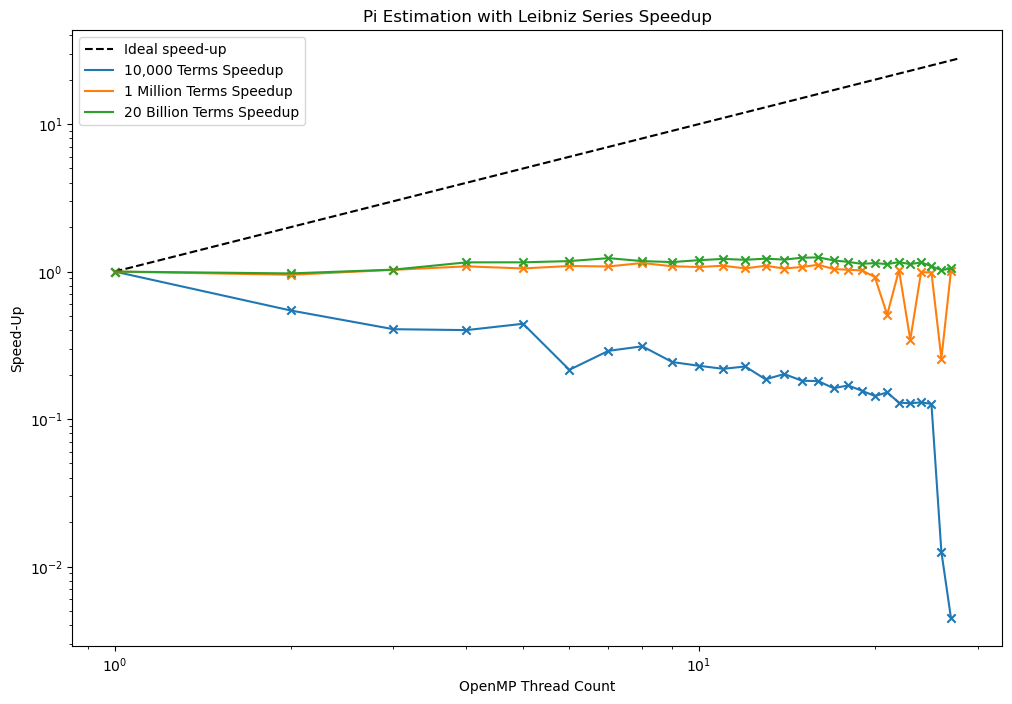

In [57]:
title = 'Pi Estimation with Leibniz Series Speedup'

f, ax= plt.subplots(figsize = (12,8))

speed = df.iloc[0]/df
speed.index = range(1, 28)
ideal = range(1, 29)

ax.plot(ideal, ideal, label = 'Ideal speed-up', color = 'black', linestyle = 'dashed')

for col in ['small', 'med', 'large']:
    plt.scatter(speed.index, speed[f'{col}_mean'], label = f'_{col_name[col]} Speedup', marker = 'x')
    plt.plot(speed.index, speed[f'{col}_mean'], label = f'{col_name[col]} Speedup')
    # ax.fill_between(x = speed.index, y1 = speed[f'{col}_min'], y2 = speed[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Speed-Up')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'pi_leibniz' + '_speedupv2.png'))

# Pi Monte Carlo

In [58]:
fp = join(log_dir,'pi_mc_openmp-407942.log')
with open(fp, 'r') as f:
    lns = f.readlines()
df = pd.DataFrame()
for i, l in enumerate(lns):
    if 'Running with' in l and i == 0:
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    if 'Running with' in l and i != 0:
        for k, v in block.items():
            df.loc[thread_c, f'{k}_max'] = np.max(v)
            df.loc[thread_c, f'{k}_min'] = np.min(v)
            df.loc[thread_c, f'{k}_mean'] = np.mean(v)
        thread_c = l.split(' ')[2]
        block = {'small': [], 'med': [], 'large':[]}     
    else:
        if '10000 values' in l:
            size = 'small'
        elif '1000000 values' in l:
            size = 'med'
        elif '20000000000 values' in l:
            size = 'large'
        elif 'microseconds' in l:
            block[size].append(int(l.split(' ')[2]))
    

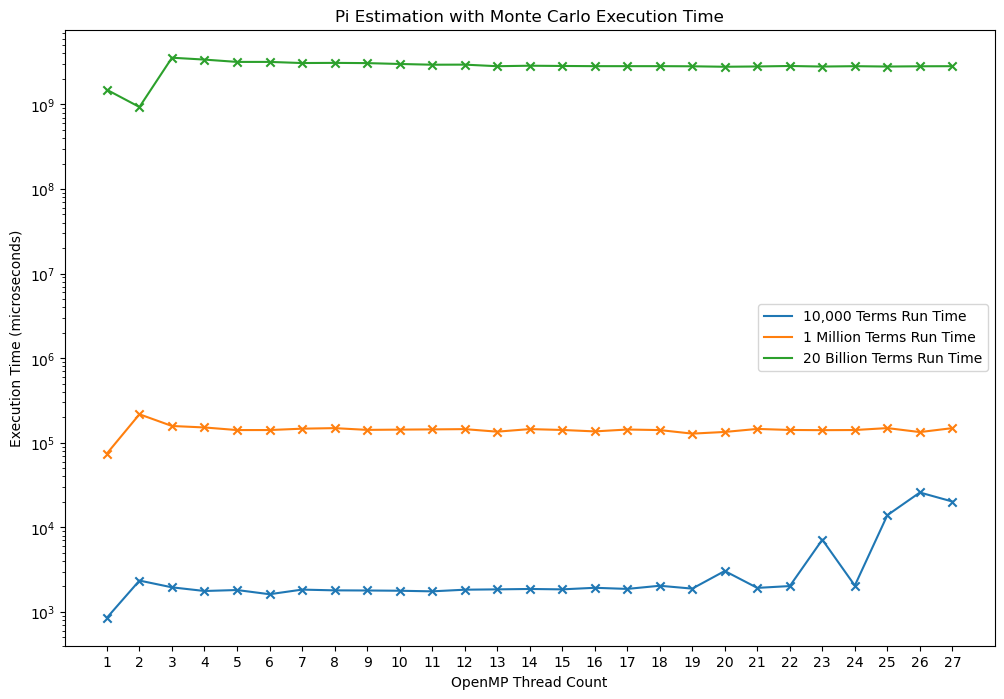

In [59]:
title = 'Pi Estimation with Monte Carlo Execution Time'

f, ax= plt.subplots(figsize = (12,8))

# df[['small_mean','med_mean','large_mean']].plot(ax = ax, legend=True)

ax.legend(labels=['10,000 Terms Execution Time Mean','1,000,000 Terms Execution Time Mean','20 Billion Terms Execution Time Mean'])
col_name = {'small':'10,000 Terms', 'med':'1 Million Terms', 'large':'20 Billion Terms'}
for col in ['small', 'med', 'large']:
    plt.scatter(df.index, df[f'{col}_mean'], label = f'_{col_name[col]} Run Time', marker = 'x')
    plt.plot(df.index, df[f'{col}_mean'], label = f'{col_name[col]} Run Time')
    # ax.fill_between(x = df.index, y1 = df[f'{col}_min'], y2 = df[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.yscale('log')
plt.ylabel('Execution Time (microseconds)')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'pi_mc' + '_execution_timev2.png'))

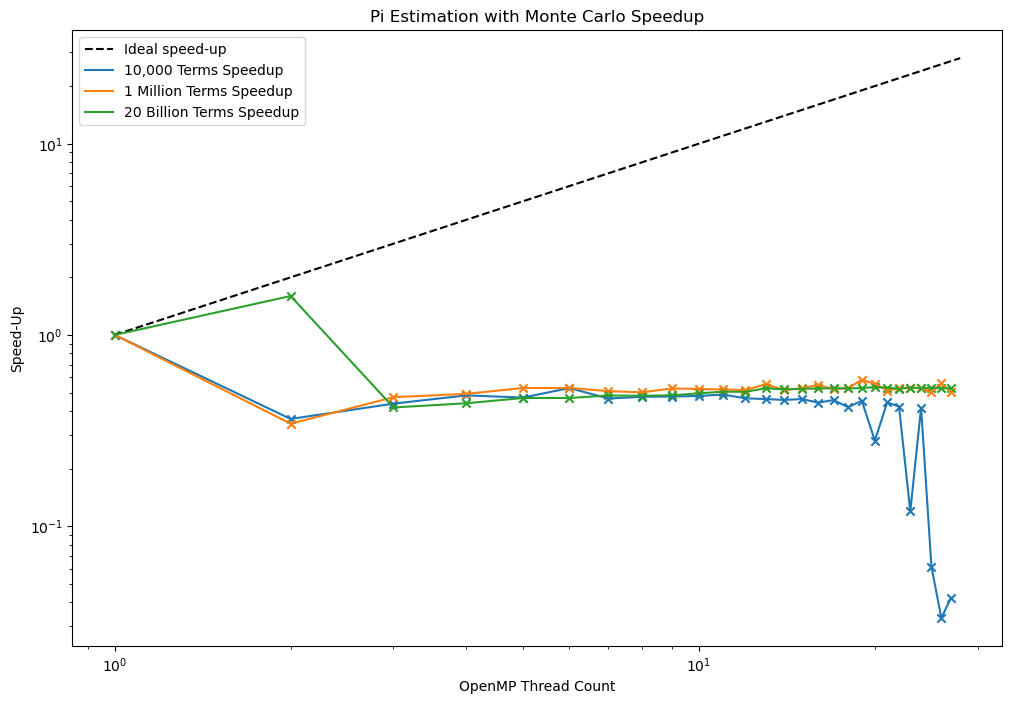

In [60]:
title = 'Pi Estimation with Monte Carlo Speedup'

f, ax= plt.subplots(figsize = (12,8))

speed = df.iloc[0]/df
speed.index = range(1, 28)
ideal = range(1, 29)

ax.plot(ideal, ideal, label = 'Ideal speed-up', color = 'black', linestyle = 'dashed')

for col in ['small', 'med', 'large']:
    plt.scatter(speed.index, speed[f'{col}_mean'], label = f'_{col_name[col]} Speedup', marker = 'x')
    plt.plot(speed.index, speed[f'{col}_mean'], label = f'{col_name[col]} Speedup')
    # ax.fill_between(x = speed.index, y1 = speed[f'{col}_min'], y2 = speed[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Speed-Up')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'pi_mc' + '_speedupv2.png'))

# MM

In [7]:
fp = join(log_dir,'mm.log')
with open(fp, 'r') as f:
    lns = f.readlines()
df = pd.DataFrame()
for i, l in enumerate(lns):
    if 'Using ' in l and i == 0:
        thread_c = int(l.split(' ')[1])
        block = {'small': [], 'med': [], 'large':[]}     
    if 'Using ' in l and i != 0:
        for k, v in block.items():
            df.loc[thread_c, f'{k}_max'] = np.max(v)
            df.loc[thread_c, f'{k}_min'] = np.min(v)
            df.loc[thread_c, f'{k}_mean'] = np.mean(v)
        thread_c = int(l.split(' ')[1])
        block = {'small': [], 'med': [], 'large':[]}     
    else:
        if 'test-Small' in l:
            size = 'small'
        elif 'test-Medium' in l:
            size = 'med'
        elif 'test-Large' in l:
            size = 'large'

        if "Average:" in l:
            block[size].append(float(l.split(' ')[1].replace('\n','')))
large_serial = 2023657630
med_serial = 37307447
small_serial = 109982
df.loc[1, 'small_mean'] = small_serial
df.loc[1, 'med_mean'] = med_serial
df.loc[1, 'large_mean'] = large_serial
df = df.sort_index()

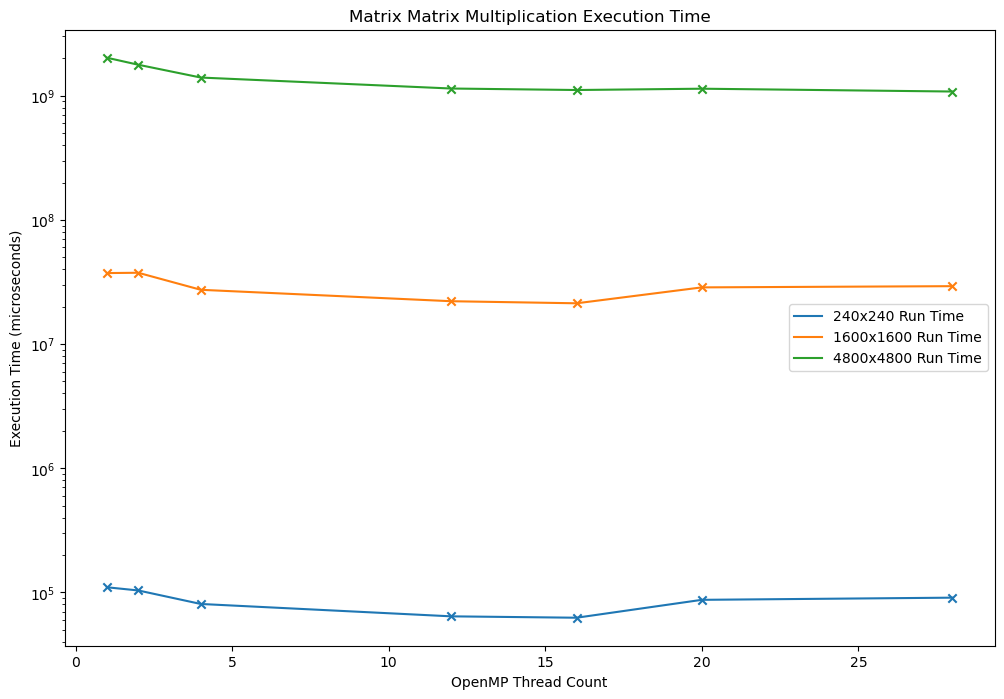

In [8]:
title = 'Matrix Matrix Multiplication Execution Time'

f, ax= plt.subplots(figsize = (12,8))

# df[['small_mean','med_mean','large_mean']].plot(ax = ax, legend=True)

ax.legend(labels=['240x240 Execution Time','1600x1600 Terms Execution Time','4800x4800 Execution Time'])
col_name = {'small':'240x240', 'med':'1600x1600', 'large':'4800x4800'}
for col in ['small', 'med', 'large']:
    plt.scatter(df.index, df[f'{col}_mean'], marker = 'x')
    plt.plot(df.index, df[f'{col}_mean'], label = f'{col_name[col]} Run Time')
    # ax.fill_between(x = df.index, y1 = df[f'{col}_min'], y2 = df[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.yscale('log')
plt.ylabel('Execution Time (microseconds)')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'mm' + '_execution_timev2.png'))

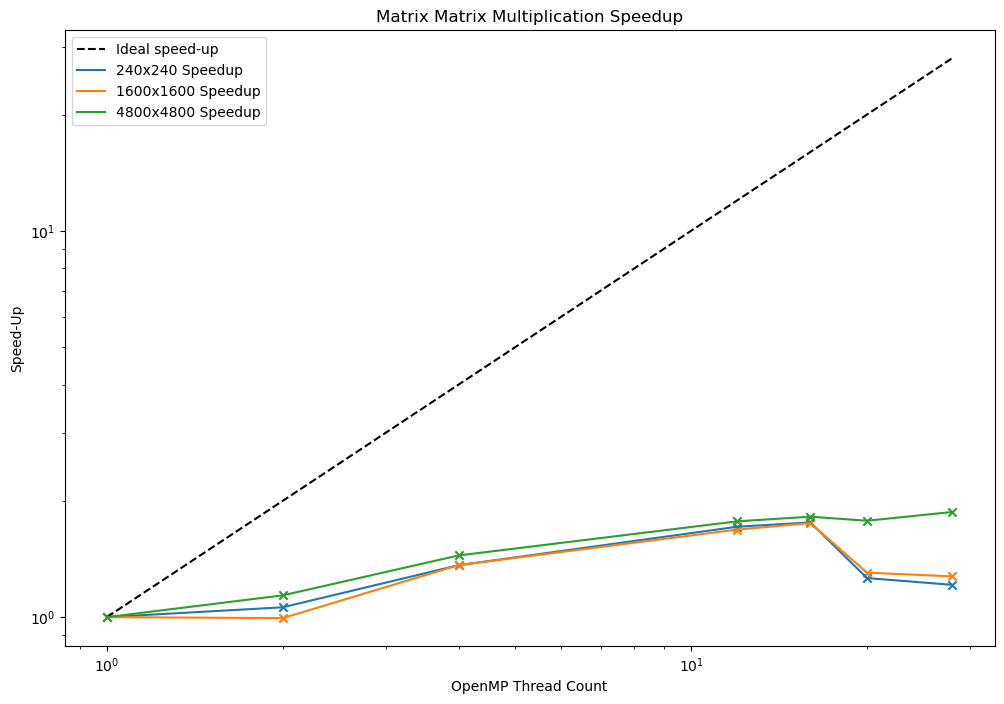

In [9]:
title = 'Matrix Matrix Multiplication Speedup'

f, ax= plt.subplots(figsize = (12,8))

speed = df.iloc[0]/df
speed.index = [1,2,4,12,16,20,28]
ideal = range(1, 29)

ax.plot(ideal, ideal, label = 'Ideal speed-up', color = 'black', linestyle = 'dashed')
for col in ['small', 'med', 'large']:
    plt.scatter(speed.index, speed[f'{col}_mean'], label = f'_{col_name[col]} Speedup', marker = 'x')
    plt.plot(speed.index, speed[f'{col}_mean'], label = f'{col_name[col]} Speedup')
    # ax.fill_between(x = speed.index, y1 = speed[f'{col}_min'], y2 = speed[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Speed-Up')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'mm' + '_speedupv2.png'))

# MV

In [14]:
fp = join(log_dir,'mv.log')
with open(fp, 'r') as f:
    lns = f.readlines()
df = pd.DataFrame()
for i, l in enumerate(lns):
    if 'Using ' in l and i == 0:
        thread_c = int(l.split(' ')[1])
        block = {'small': [], 'med': [], 'large':[]}     
    if 'Using ' in l and i != 0:
        for k, v in block.items():
            df.loc[thread_c, f'{k}_max'] = np.max(v)
            df.loc[thread_c, f'{k}_min'] = np.min(v)
            df.loc[thread_c, f'{k}_mean'] = np.mean(v)
        thread_c = int(l.split(' ')[1])
        block = {'small': [], 'med': [], 'large':[]}     
    else:
        if 'test-mv_small' in l:
            size = 'small'
        elif 'test-mv_medium' in l:
            size = 'med'
        elif 'test-mv_large' in l:
            size = 'large'

        if "Average:" in l:
            block[size].append(float(l.split(' ')[1].replace('\n','')))
large_serial = 340774
med_serial = 36868
small_serial = 862
df.loc[1, 'small_mean'] = small_serial
df.loc[1, 'med_mean'] = med_serial
df.loc[1, 'large_mean'] = large_serial
df = df.sort_index()

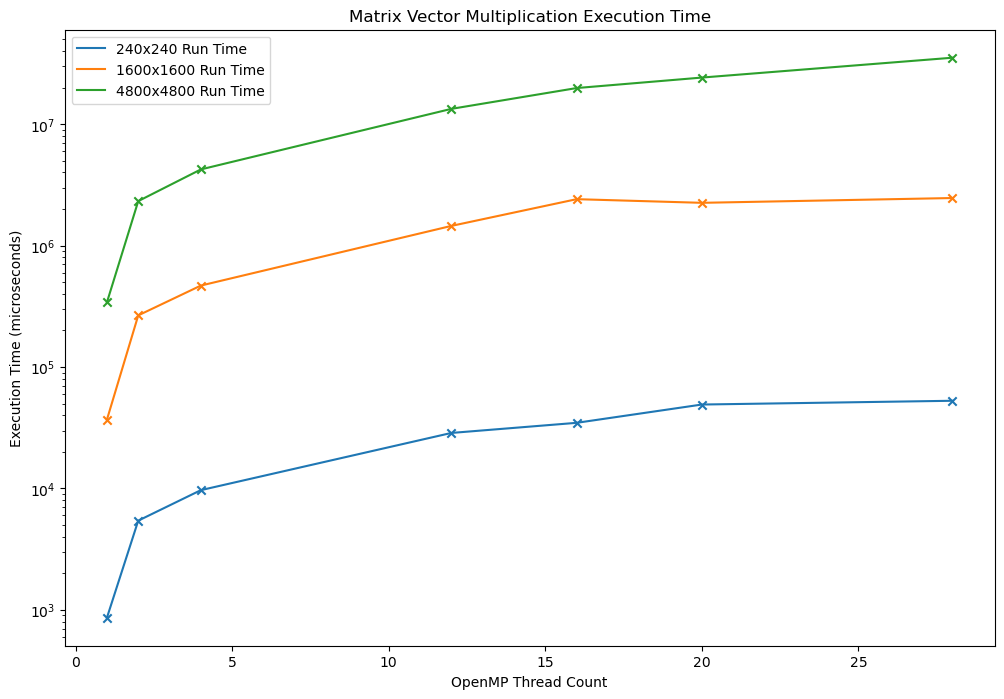

In [15]:
title = 'Matrix Vector Multiplication Execution Time'

f, ax= plt.subplots(figsize = (12,8))

# df[['small_mean','med_mean','large_mean']].plot(ax = ax, legend=True)

ax.legend(labels=['240x240 Execution Time','1600x1600 Terms Execution Time','4800x4800 Execution Time'])
col_name = {'small':'240x240', 'med':'1600x1600', 'large':'4800x4800'}
for col in ['small', 'med', 'large']:
    plt.scatter(df.index, df[f'{col}_mean'], marker = 'x')
    plt.plot(df.index, df[f'{col}_mean'], label = f'{col_name[col]} Run Time')
    # ax.fill_between(x = df.index, y1 = df[f'{col}_min'], y2 = df[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.yscale('log')
plt.ylabel('Execution Time (microseconds)')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'mv' + '_execution_timev2.png'))

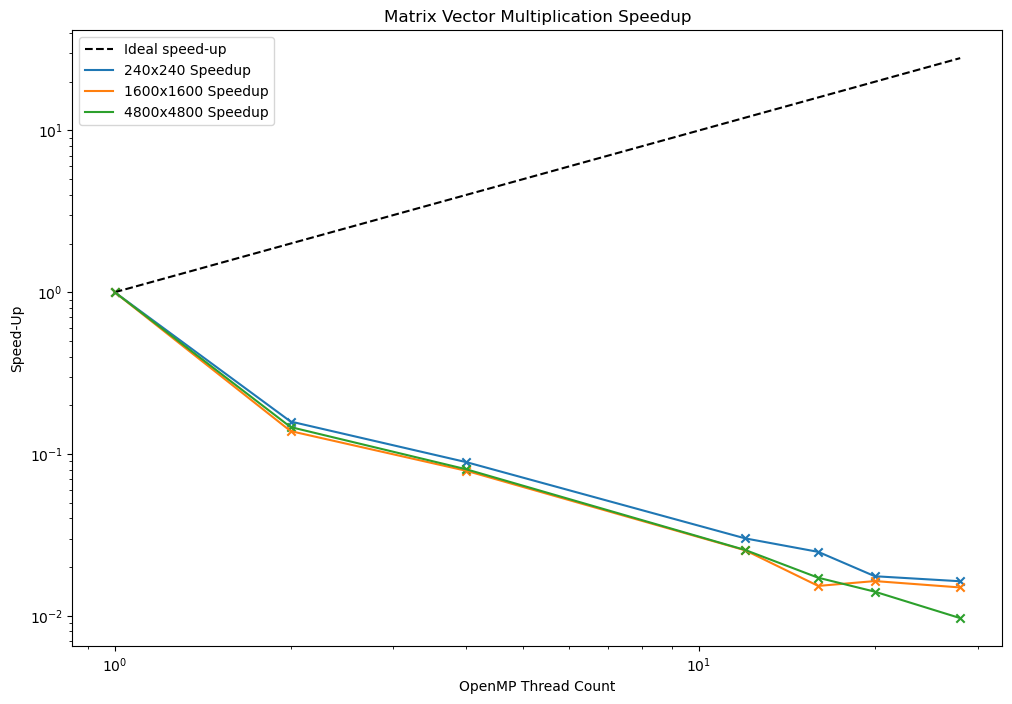

In [16]:
title = 'Matrix Vector Multiplication Speedup'

f, ax= plt.subplots(figsize = (12,8))

speed = df.iloc[0]/df
speed.index = [1,2,4,12,16,20,28]
ideal = range(1, 29)

ax.plot(ideal, ideal, label = 'Ideal speed-up', color = 'black', linestyle = 'dashed')
for col in ['small', 'med', 'large']:
    plt.scatter(speed.index, speed[f'{col}_mean'], label = f'_{col_name[col]} Speedup', marker = 'x')
    plt.plot(speed.index, speed[f'{col}_mean'], label = f'{col_name[col]} Speedup')
    # ax.fill_between(x = speed.index, y1 = speed[f'{col}_min'], y2 = speed[f'{col}_max'], alpha = 0.3, label = f'{col_name[col]} 5-Run Min-Max')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Speed-Up')
plt.xlabel('OpenMP Thread Count')
plt.legend()
plt.title(title)
plt.savefig(join(fig_dir, 'mv' + '_speedupv2.png'))